# Simple Naive Bayes

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.model_selection import train_test_split

from math import sqrt
from math import pi
from math import exp

from sklearn.metrics import accuracy_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving gender_height_weight.csv to gender_height_weight (3).csv


In [5]:
import io
df = pd.read_csv(io.BytesIO(uploaded['gender_height_weight.csv']))
df.head()

,Gender,Height(inches),Weight(lbs)
0,1,67,150
1,0,67,140
2,1,67,100
3,1,62,185
4,0,66,145


In [6]:
data = df.to_numpy()
data

array([[  1,  67, 150],
       [  0,  67, 140],
       [  1,  67, 100],
       ...,
       [  0,  75, 220],
       [  0,  76, 178],
       [  1,  67, 130]])

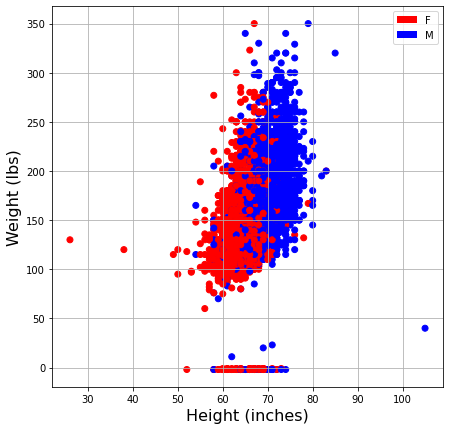

In [9]:
features = data[:,[1,2]]
labels = data[:,0]

f, ax1 = plt.subplots(1, 1, figsize=(7,7)) # 1 column, 1 row

ax1.scatter(features[:,0], features[:,1], c=labels, cmap=plt.cm.bwr)        
ax1.grid(True)

plt.ylabel("Weight (lbs)", fontsize=16)
plt.xlabel("Height (inches)", fontsize=16)


recs = []
class_colours=["r","b"]
for i in range(2):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
plt.legend(recs,["F","M"],loc=1)

In [10]:
features = data[:,[1,2]]
labels = data[:,0]

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.1, random_state = 100)

In [12]:
def getPriors(labels):
    priors = {}
    for className in labels:
        N = labels.size
        class_occurrence = (labels == className).sum()
        priors[className] = class_occurrence/N
    return priors

priors = getPriors(labels_train)

In [13]:
priors

{0: 0.5085022445925724, 1: 0.4914977554074276}

In [14]:
def fit(features, labels):
    uniqueClasses = np.unique(labels)
    coeffs = {}
    for className in uniqueClasses:
      featuresInClass = features[labels == className]
      statsInClass = [(np.mean(feature), np.std(feature)) for feature in zip(*featuresInClass)]            
      coeffs[className] = statsInClass    
    
    return coeffs

model = fit(features_train, labels_train)

In [15]:
model

{0: [(69.59657570893526, 3.3527911026371027),
  (163.66238630283573, 38.52142167903383)],
 1: [(64.43011347910324, 3.000581346637603),
  (132.66731248270136, 38.37250271665388)]}

In [16]:
def getLikelihood(x, featureIndex, model, className):
    classStats = model[className]
    mean = classStats[featureIndex][0]
    std  = classStats[featureIndex][1]
    f = (1/(sqrt(2*pi*pow(std,2))) * exp(-pow((x-mean),2)/(2*pow(std,2))))
    return f

def getPosterior(x, model, priors):
    posteriors = {}
    for className in priors:
        p = priors[className]
        for featureIndex in range(x.size):
            p = p * (getLikelihood (x[featureIndex], featureIndex, model, className))
        posteriors[className] = p
    return posteriors

In [17]:
x = np.array([59])

In [18]:
getLikelihood(x, 0, model, 0)

0.0008061935595272527

In [19]:
getLikelihood(x, 0, model, 1)

0.02585559243089853

In [20]:
def classify(x, model, priors):
    posteriors = getPosterior(x, model, priors)
    return max(posteriors, key=lambda key: posteriors[key])

predictions = [classify(x, model, priors) for x in features_test]

In [21]:
print("Prediction accuracy: %.2f\n" % accuracy_score(labels_test, predictions))

Prediction accuracy: 0.77

